In [6]:
%matplotlib widget

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
import math

EPS = math.e

In [7]:
df = pd.read_csv("./data/haberman.csv")
df.columns = ["age", "years-op", "ganglia", "predictor"]
df['predictor'] = df["predictor"].replace(2, 0)

"""
1 = the patient survived 5 years or longer
2 = ~1, the patient died within 5 year
"""

df["w0"] = 1
df.head(5)

,age,years-op,ganglia,predictor,w0
0,30,62,3,1,1
1,30,65,0,1,1
2,31,59,2,1,1
3,31,65,4,1,1
4,33,58,10,1,1


In [8]:
x = df[["w0", "age", "years-op", "ganglia"]].to_numpy().astype(float)
y = np.array(df["predictor"]).astype(float)

display(x)
display(y)
display(x.shape, y.shape)

array([[ 1., 30., 62.,  3.],
       [ 1., 30., 65.,  0.],
       [ 1., 31., 59.,  2.],
       ...,
       [ 1., 77., 65.,  3.],
       [ 1., 78., 65.,  1.],
       [ 1., 83., 58.,  2.]])

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1.

(305, 4)

(305,)

In [9]:
# 70% for train and 30% test
# data preprocessing: normalization, standardization, etc
np.random.seed(2)
m, = y.shape
idx = np.array(np.arange(m))
include_idx = set(np.random.choice(idx, size = int(0.7*m), replace=False))
mask = np.array([(i in include_idx) for i in range(m)])

trainX = x[mask]
testX = x[~mask]

trainY = y[mask]
testY = y[~mask]

display(trainX.shape, testX.shape)
display(trainY.shape, testY.shape)

(213, 4)

(92, 4)

(213,)

(92,)

Text(0.5, 0, 'ganglia')

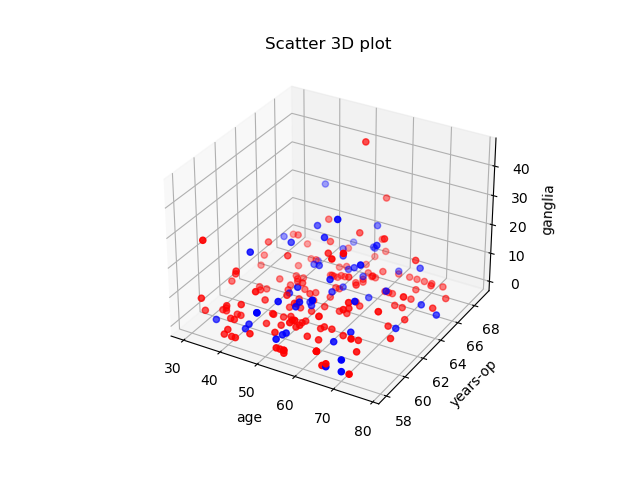

In [10]:
# 3D PLOT
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(trainX[:,1], trainX[:,2], trainX[:,3], c=trainY, cmap="bwr")#  edgecolors='black'     red (for 0) and blue (for 1)
ax.set_title('Scatter 3D plot')
ax.set_xlabel('age')
ax.set_ylabel('years-op')
ax.set_zlabel('ganglia')

In [11]:
def h(x, w):
    return np.sum(np.multiply(x, w))

def s(x, w):
    return 1/(1+EPS**(-1 * h(x,w)))

In [12]:
def l(x, w, y):
    m, = y.shape
    on = np.ones(m)
    
    logSX = np.log(np.array([s(te, w) for te in x]))
    cLogSX = np.log(np.array([(1 - s(te, w)) for te in x]))

    # display(logSX)
    # display(cLogSX)

    return np.sum(
            np.multiply(y, logSX) + np.multiply(on - y, cLogSX)
        )* (-1/m)

In [13]:
def update(w, alfa, deriv):
    return w - alfa*deriv

In [14]:
def test(x_test, w, y_test):
    return l(x_test, w, y_test)

In [15]:
def derivatives(x, y, w):
    n, c = x.shape
    return np.array([
                np.sum(
                        [
                                1/n * (y[i] - s(x[i,:], w)) * (-1 if j == 0 else -x[i,j]) for i in range(n)
                        ]
                ) for j in range(c)
            ])
        

In [16]:
arrL = []
arrT = []

def train(x, y, alfa, epochs):
    r, c = x.shape
    w = np.array([np.random.rand() for i in range(c)])     # k+1 parametros w0 + w1x1 + ... wkxk
    for _ in range(epochs):
        L = l(x, w, y)
        der = derivatives(x, y, w)
        w = update(w, alfa, der)
    return w
        

In [17]:
alfa = 0.5
epochs = 2000
arrL = []
arrT = []

res = train(trainX, trainY, alfa, epochs)
res

C:\Users\jeff1\AppData\Local\Temp\ipykernel_20692\3660224969.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 1/(1+EPS**(-1 * h(x,w)))
C:\Users\jeff1\AppData\Local\Temp\ipykernel_20692\126636125.py:5: RuntimeWarning: divide by zero encountered in log
  logSX = np.log(np.array([s(te, w) for te in x]))
C:\Users\jeff1\AppData\Local\Temp\ipykernel_20692\126636125.py:12: RuntimeWarning: invalid value encountered in multiply
  np.multiply(y, logSX) + np.multiply(on - y, cLogSX)
C:\Users\jeff1\AppData\Local\Temp\ipykernel_20692\126636125.py:6: RuntimeWarning: divide by zero encountered in log
  cLogSX = np.log(np.array([(1 - s(te, w)) for te in x]))


array([  0.7051179 ,  -6.14626068,   4.47999139, -33.50675661])

In [18]:
def testing(x_test, y_test, w):
  n = len(y_test)
  y_pred = []
  for i in range(n):
    y_pred.append(round(s(x_test[i, :], w)))
  
  aciertos = sum(y_pred == y_test)
  print("Número de datos de test: ", n)
  print("Número de datos correctos: ", aciertos)
  print(f"Porcentaje de aciertos: {100*aciertos/n} %")
  print(f"Porcentaje de fallos: {100*(n - aciertos)/n} %")

In [19]:
testing(testX, testY, res)

Número de datos de test:  92
Número de datos correctos:  38
Porcentaje de aciertos: 41.30434782608695 %
Porcentaje de fallos: 58.69565217391305 %


C:\Users\jeff1\AppData\Local\Temp\ipykernel_20692\3660224969.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 1/(1+EPS**(-1 * h(x,w)))


# sklearn

In [20]:
# logistic regression with sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0).fit(trainX, trainY)
y_pred = clf.predict(testX)
print(f"accuracy_score = {accuracy_score(testY, y_pred)}")
print(f"Plot error function of clf along training")

accuracy_score = 0.7391304347826086
Plot error function of clf along training


In [ ]:
# https://github.com/gitganeshnethi/Machine-Learning/blob/master/Logistic%20regression.ipynb
# https://nbviewer.org/github/arnaldog12/Machine_Learning/blob/master/Regress%C3%A3o%20Log%C3%ADstica.ipynb